In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import torch
import numpy as np
from minimodel import data
from minimodel import model_builder
import matplotlib.pyplot as plt

mouse_id = 3

# save weights

In [4]:
# save all conv2 weights
conv2_1x1 = []
conv2_spatial = []
readout_wc = []

server_path = '/home/carsen/dm11/Farah/EncodingModel/'
project_root_path = '/media/carsen/ssd1/EncodingModel/'

wc_coef = 0.2
hs_readout = 0.03
l2_readout = 0.2
nconv1 = 16
nconv2 = 64
nlayers = 2
seed = 1

# load valid neurons indexes
n_max_neurons = data.NNs_valid[mouse_id]
result_path = '../figures/save_results/outputs'
dat = np.load(os.path.join(result_path, f'fullmodel_{data.mouse_names[mouse_id]}_results.npz'), allow_pickle=True)
ineurons = dat['valid_idxes']
print(f'Number of neurons: {len(ineurons)}')

Number of neurons: 3040


In [5]:
ineur = ineurons[0]
mname = data.mouse_names[mouse_id]
if mname == 'L1_A5': mname='l1a5'
if mname == 'L1_A1': mname='l1a1'
for ineur in ineurons:
    model, in_channels = model_builder.build_model(NN=1, n_layers=nlayers, n_conv=nconv1, n_conv_mid=nconv2, Wc_coef=wc_coef)
    model_name = model_builder.create_model_name_old(data.mouse_names[mouse_id], data.exp_date[mouse_id], ineuron=ineur, n_layers=nlayers, in_channels=in_channels, seed=seed,suffix=f'wc{wc_coef:.0e}_hs{hs_readout:.0e}_l2{l2_readout:.0e}')
    model_path = os.path.join(server_path, 'weights', f'{mname}_{data.exp_date[mouse_id]}_minimodel_16_{nconv2}', model_name)
    model.load_state_dict(torch.load(model_path), strict=False)

    conv2_1x1.append(model.core.features.layer1.ds_conv.in_depth_conv.weight.data.cpu().numpy().squeeze())
    conv2_spatial.append(model.core.features.layer1.ds_conv.spatial_conv.weight.data.cpu().numpy().squeeze())
    readout_wc.append(model.readout.Wc.data.cpu().numpy().squeeze())

input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn4_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l22e-01.pt
input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn5_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l22e-01.pt
input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn6_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l22e-01.pt
input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn8_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l22e-01.pt
input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn9_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l22e-01.pt
input shape of readout:  (64, 33, 65)
model name:  FX10_051623_2layer_16_64_clamp_sensorium_depthsep_pool_nn10_seed1_pretrained_lessconv2_elu_wc2e-01_hs3e-02_l2

In [6]:
model

Encoder(
  (core): Core(
    (features): Sequential(
      (layer0): Sequential(
        (conv): Conv2d(1, 16, kernel_size=(25, 25), stride=(1, 1), padding=(12, 12), bias=False)
        (norm): BatchNorm2d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (activation): ReLU()
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (layer1): Sequential(
        (ds_conv): Sequential(
          (in_depth_conv): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (spatial_conv): Conv2d(64, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), groups=64, bias=False)
        )
        (norm): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
    )
  )
  (readout): Readout(
    (activation): ELU(alpha=1.0)
  )
  (bceloss): BCELoss()
)

In [7]:
model.core.features.layer1.ds_conv.spatial_conv.weight.data.shape

torch.Size([64, 1, 9, 9])

In [53]:
readout_wc = np.array(readout_wc)
conv2_1x1 = np.array(conv2_1x1)
conv2_spatial = np.array(conv2_spatial)
conv1 = model.core.features.layer0.conv.weight.data.cpu().numpy().squeeze()
print(readout_wc.shape, conv2_1x1.shape, conv2_spatial.shape)

(1239, 64) (1239, 64, 16) (1239, 64, 9, 9)


In [54]:
# save weights
save_name = f'{data.mouse_names[mouse_id]}_{data.exp_date[mouse_id]}_weights.npz'
np.savez(save_name, readout_wc=readout_wc, conv2_1x1=conv2_1x1, conv2_spatial=conv2_spatial, conv1=conv1)

# load weights

In [137]:
dat = np.load(os.path.join(result_path, f'minimodel_{data.mouse_names[mouse_id]}_result.npz'), allow_pickle=True)
feve_all = dat['feve_all']
fev_all = dat['fev_all']
print(feve_all.shape, fev_all.shape)

(3040,) (3040,)


In [138]:
# load neurons
data_path = '/media/carsen/ssd1/minimodel/data'
fname = '%s_nat60k_%s.npz'%(data.db[mouse_id]['mname'], data.db[mouse_id]['datexp'])
spks, istim_train, istim_test, xpos, ypos, spks_rep_all, iplanes = data.load_neurons(file_path = os.path.join(data_path, fname), mouse_id = mouse_id, return_iplane=True)
n_stim, n_neurons = spks.shape


loading activities from /media/carsen/ssd1/minimodel/data/FX10_nat60k_2023_05_16.npz


In [139]:
iplanes = iplanes[ineurons]
layers = np.zeros(iplanes.shape)
layers[iplanes==0] = 2
layers[iplanes==1] = 1
layers[iplanes==2] = 2
layers[iplanes==3] = 1

print(len(layers), len(ineurons))

3040 3040


In [140]:
save_name = f'{data.mouse_names[mouse_id]}_{data.exp_date[mouse_id]}_weights.npz'
all_weights = np.load(save_name, allow_pickle=True)
readout_wc = all_weights['readout_wc']
conv2_1x1 = all_weights['conv2_1x1']
conv2_spatial = all_weights['conv2_spatial']
conv1 = all_weights['conv1']
layers = np.repeat(layers[:, np.newaxis], readout_wc.shape[1], axis=1)
print(readout_wc.shape, conv2_1x1.shape, conv2_spatial.shape, conv1.shape, layers.shape)

(3040, 64) (3040, 64, 16) (3040, 64, 9, 9) (16, 25, 25) (3040, 64)


1160
[ 1  2  6  7 10 11 19 22 24 25 29 31 32 33 34 40 43 45 46 48 49 53 54 55
 56 58 59 60 61 63]


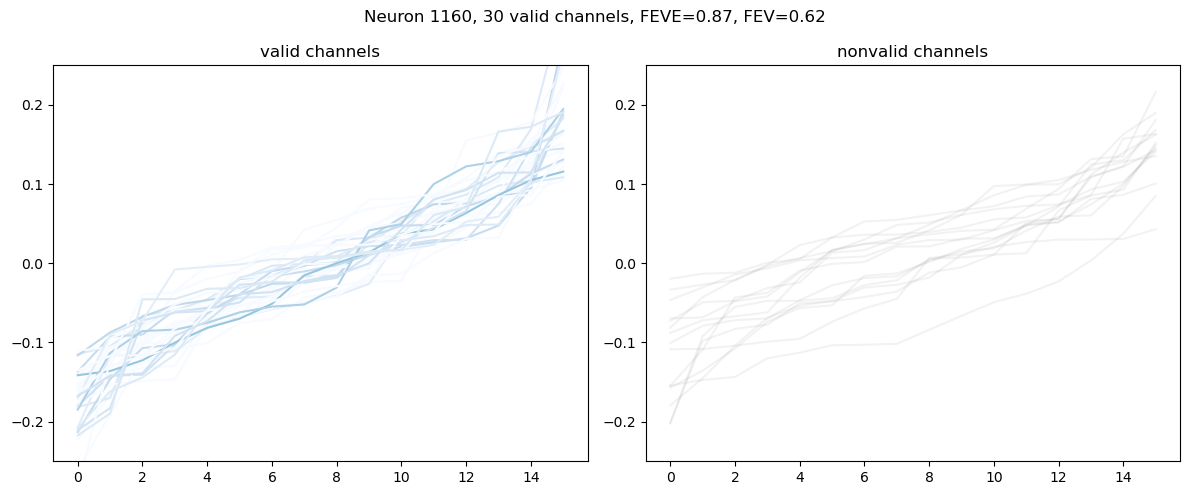

In [7]:
NN = readout_wc.shape[0]
ineuron = np.random.choice(NN)
print(ineuron)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cmap = plt.get_cmap('Blues')
wc = readout_wc[ineuron]
c1 = conv2_1x1[ineuron]
c2 = conv2_spatial[ineuron]
valid_channels = np.where(np.abs(wc) > 0.1)[0]
print(valid_channels)
for i in valid_channels:
    ax[0].plot(np.sort(c1[i]), label=f'c1_{i}', color=cmap(wc[i]))
ax[0].set_ylim([-0.25, 0.25])
ax[0].set_title('valid channels')

nonvalid_channels = np.where(np.abs(wc) < 0.01)[0]
for i in nonvalid_channels:
    ax[1].plot(np.sort(c1[i]), label=f'c1_{i}', color='gray', alpha=0.1)
ax[1].set_ylim([-0.25, 0.25])
ax[1].set_title('nonvalid channels')
plt.suptitle(f'Neuron {ineuron}, {len(valid_channels)} valid channels, FEVE={feve_all[ineuron]:.2f}, FEV={fev_all[ineuron]:.2f}')
plt.tight_layout()

In [141]:
# remove the zero channels
readout_wc = readout_wc.reshape(-1)
layers = layers.reshape(-1)
conv2_1x1 = conv2_1x1.reshape(-1, conv2_1x1.shape[2])
conv2_spatial = conv2_spatial.reshape(-1, conv2_spatial.shape[2], conv2_spatial.shape[3])
print(readout_wc.shape, conv2_1x1.shape, conv2_spatial.shape)

conv2_1x1 = conv2_1x1[np.abs(readout_wc) > 0.01]
conv2_spatial = conv2_spatial[np.abs(readout_wc) > 0.01]
layers = layers[np.abs(readout_wc) > 0.01]
readout_wc = readout_wc[np.abs(readout_wc) > 0.01]
print(conv2_1x1.shape, conv2_spatial.shape, readout_wc.shape, layers.shape)

(194560,) (194560, 16) (194560, 9, 9)
(95705, 16) (95705, 9, 9) (95705,) (95705,)


In [82]:
conv1_contribution = conv2_1x1 * readout_wc[:, None]
conv1_contribution_pos = conv1_contribution.copy()
conv1_contribution_pos[conv1_contribution < 0] = 0
conv1_contribution_neg = conv1_contribution.copy()
conv1_contribution_neg[conv1_contribution > 0] = 0

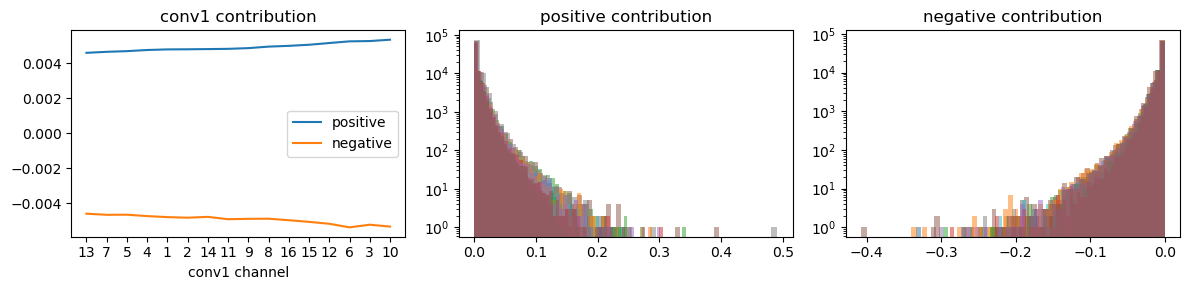

In [172]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
isort = np.argsort(np.mean(conv1_contribution_pos, axis=0))
ax[0].plot(np.mean(conv1_contribution_pos, axis=0)[isort], label='positive')
ax[0].plot(np.mean(conv1_contribution_neg, axis=0)[isort], label='negative')
ax[0].legend()
ax[0].set_title('conv1 contribution')
ax[0].set_xlabel('conv1 channel')
ax[0].set_xticks(np.arange(0, 16, 1), isort+1)
for i in range(16):
    ax[1].hist(conv1_contribution_pos[:, i], bins=50, alpha=0.5, label=f'channel {i}', log=True)
# ax[1].legend()
ax[1].set_title('positive contribution')
for i in range(16):
    ax[2].hist(conv1_contribution_neg[:, i], bins=50, alpha=0.5, label=f'channel {i}', log=True)
# ax[2].legend()
ax[2].set_title('negative contribution')
plt.tight_layout()

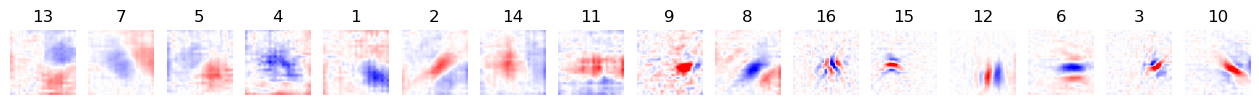

In [165]:
fig, ax = plt.subplots(1, 16, figsize=(16, 3))
for i in range(16):
    ax[i].imshow(conv1[isort[i]], cmap='bwr', vmin=-0.25, vmax=0.25)
    ax[i].set_title(f'{isort[i]+1}')
    ax[i].axis('off')

# PCA on the spatial conv2

In [142]:
conv2_spatial = conv2_spatial.reshape(conv2_spatial.shape[0], -1)
print(conv2_spatial.shape)

(95705, 81)


In [143]:
print(conv2_spatial.shape)
# pca on spatial weights and visualize the top N PCs
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
in_data = conv2_spatial.T
pca.fit(in_data)
print(pca.explained_variance_ratio_)
spatial_pcs = pca.transform(in_data)
print(spatial_pcs.shape)

(95705, 81)
[0.1048409  0.09826162 0.08469114 0.08031453 0.07705691 0.0659866
 0.05466024 0.04831092 0.04068673 0.03724327 0.03469356 0.03069001
 0.02187628 0.0214157  0.01990459 0.01702163 0.01543882 0.01441482
 0.0105333  0.01018775 0.0091684  0.00860696 0.00811286 0.00584321
 0.00572319 0.00523845 0.00497328 0.00455451 0.00454272 0.00365018
 0.0036144  0.00351185 0.00337751 0.00274722 0.00263728 0.0025478
 0.00251373 0.00218921 0.00189702 0.00174041 0.00167012 0.00156558
 0.00149428 0.00146345 0.00142005 0.00132764 0.00130724 0.00104916
 0.00100823 0.00094244 0.0008668  0.00082878 0.00078925 0.00071163
 0.00068181 0.00066339 0.00056034 0.00055563 0.00049211 0.00047938
 0.00044779 0.00043255 0.00036453 0.00034095]
(81, 64)


In [144]:
np.save(f'{data.mouse_names[mouse_id]}_{data.exp_date[mouse_id]}_spatial_pcs.npy', spatial_pcs.T.reshape(-1, 9, 9))

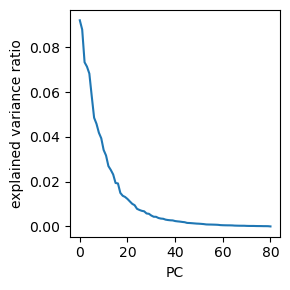

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
minimodel_ev_ratio = pca.explained_variance_ratio_
ax.plot(pca.explained_variance_ratio_, '-')
ax.set_xlabel('PC')
ax.set_ylabel('explained variance ratio')
plt.tight_layout()

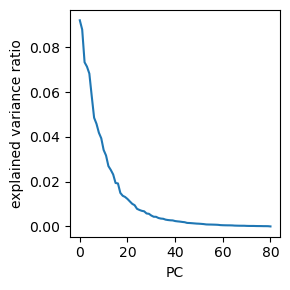

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(pca.explained_variance_ratio_, '-')
# ax.legend()
ax.set_xlabel('PC')
ax.set_ylabel('explained variance ratio')
plt.tight_layout()

0.99999994


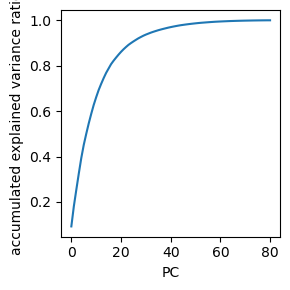

In [133]:
# accumulated explained variance
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(np.cumsum(pca.explained_variance_ratio_), '-')
ax.set_xlabel('PC')
ax.set_ylabel('accumulated explained variance ratio')
plt.tight_layout()
print(np.sum(pca.explained_variance_ratio_))

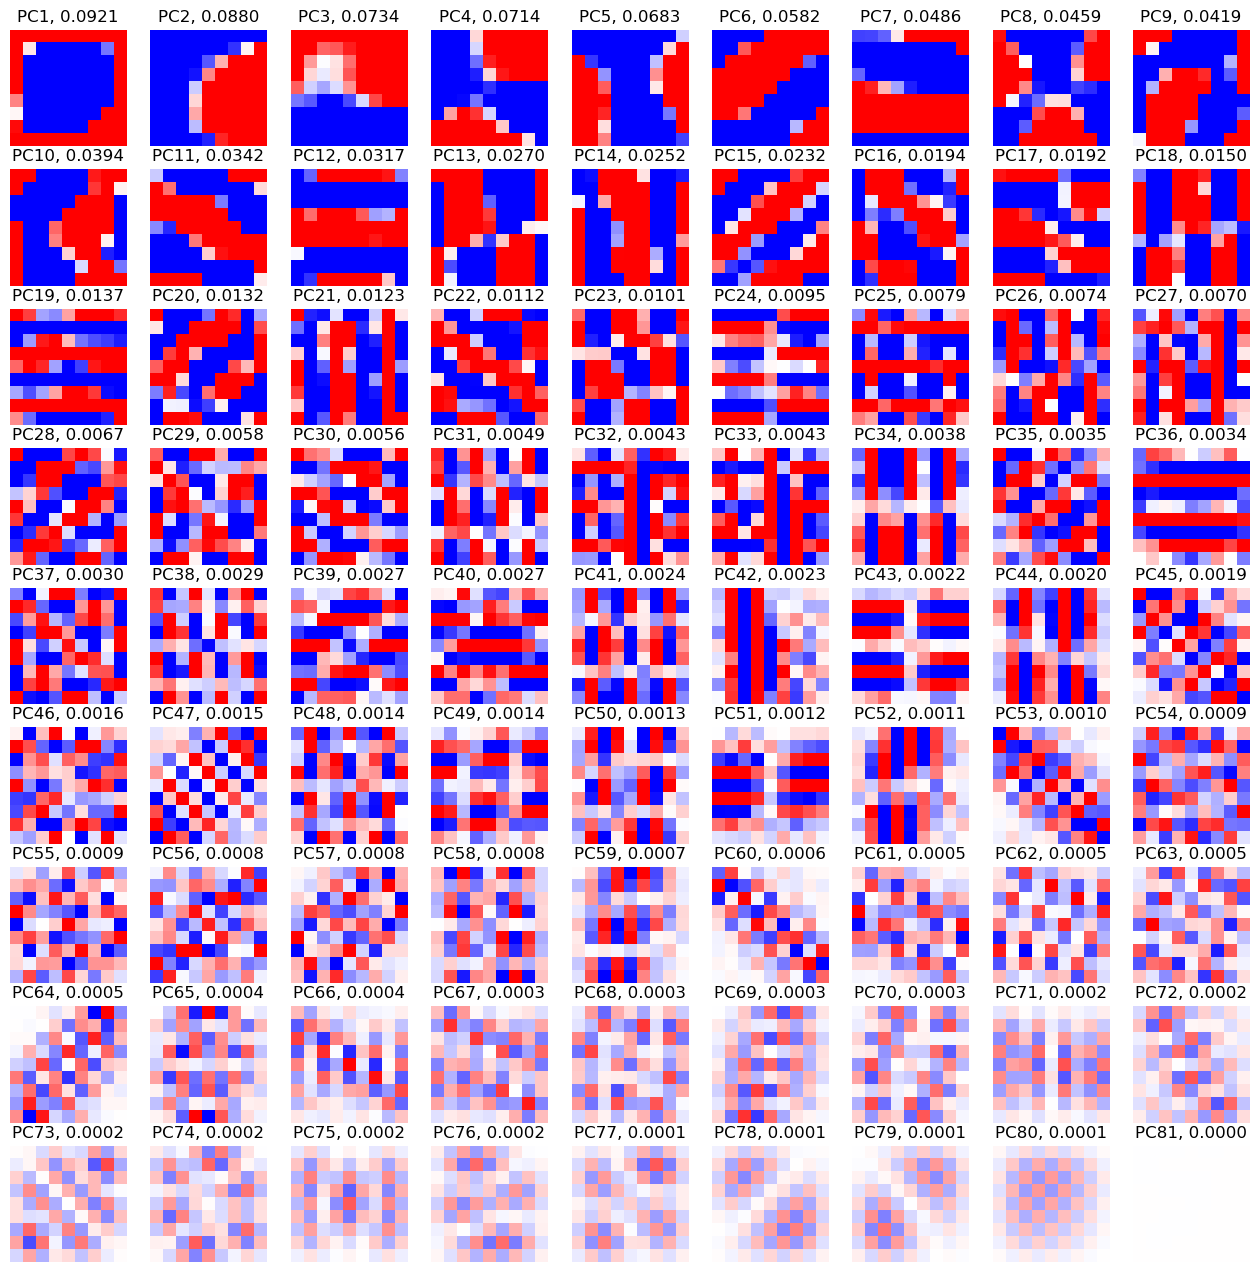

In [134]:
# visualize PCs
fig, ax = plt.subplots(9, 9, figsize=(16, 16))
for i in range(81):
    ax[i//9, i%9].imshow(spatial_pcs[:, i].reshape(9, 9), cmap='bwr', vmin=-0.5, vmax=0.5)
    ax[i//9, i%9].axis('off')
    ax[i//9, i%9].set_title(f'PC{i+1}, {pca.explained_variance_ratio_[i]:.4f}')

# cluster

In [75]:
save_name = f'{data.mouse_names[mouse_id]}_{data.exp_date[mouse_id]}_weights.npz'
all_weights = np.load(save_name, allow_pickle=True)
readout_wc = all_weights['readout_wc']
conv2_1x1 = all_weights['conv2_1x1']
conv2_spatial = all_weights['conv2_spatial']
conv1 = all_weights['conv1']
layers = np.repeat(layers[:, np.newaxis], readout_wc.shape[1], axis=1)
print(readout_wc.shape, conv2_1x1.shape, conv2_spatial.shape, conv1.shape, layers.shape)

# remove the zero channels
readout_wc = readout_wc.reshape(-1)
layers = layers.reshape(-1)
conv2_1x1 = conv2_1x1.reshape(-1, conv2_1x1.shape[2])
conv2_spatial = conv2_spatial.reshape(-1, conv2_spatial.shape[2], conv2_spatial.shape[3])
print(readout_wc.shape, conv2_1x1.shape, conv2_spatial.shape)

thresh = 0.6
conv2_1x1 = conv2_1x1[np.abs(readout_wc) > thresh]
conv2_spatial = conv2_spatial[np.abs(readout_wc) > thresh]
layers = layers[np.abs(readout_wc) > thresh]
readout_wc = readout_wc[np.abs(readout_wc) > thresh]
print(conv2_1x1.shape, conv2_spatial.shape, readout_wc.shape)

(3040, 64) (3040, 64, 16) (3040, 64, 9, 9) (16, 25, 25) (3040, 64)
(194560,) (194560, 16) (194560, 9, 9)
(2079, 16) (2079, 9, 9) (2079,)


In [65]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# conv2_1x1 = scaler.fit_transform(conv2_1x1) 

In [79]:
# tsne to visualize the weights
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
if conv2_1x1.shape[0] > 5000:
    ichannels = np.random.choice(conv2_1x1.shape[0], 5000, replace=False)
else:
    ichannels = np.arange(conv2_1x1.shape[0])
ipos = np.where(readout_wc[ichannels] > 0)[0]
ineg = np.where(readout_wc[ichannels] < 0)[0]
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
conv2_1x1_tsne = tsne.fit_transform(conv2_1x1[ichannels])

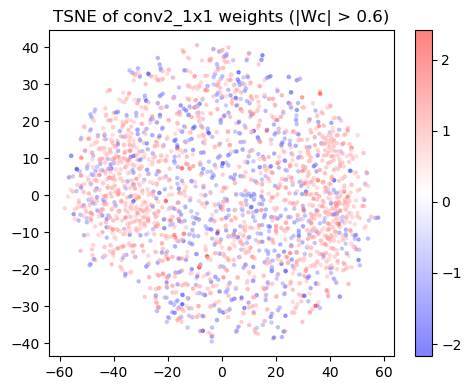

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(conv2_1x1_tsne[:, 0], conv2_1x1_tsne[:, 1], c=readout_wc[ichannels], cmap='bwr', s=5, alpha=0.5)
ax.set_title(f'TSNE of conv2_1x1 weights (|Wc| > {thresh})')
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
plt.tight_layout()

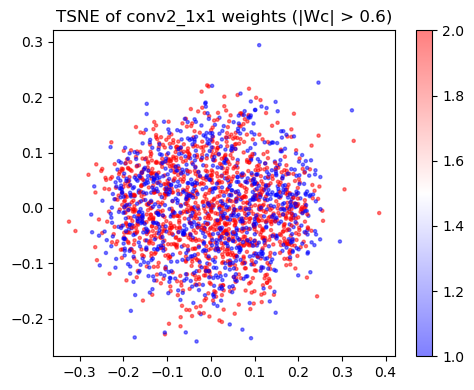

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D
conv2_1x1_pca = pca.fit_transform(conv2_1x1[ichannels])  # Apply PCA

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(conv2_1x1_pca[:, 0], conv2_1x1_pca[:, 1], c=layers[ichannels], cmap='bwr', s=5, alpha=0.5, vmin=1, vmax=2)
ax.set_title(f'TSNE of conv2_1x1 weights (|Wc| > {thresh})')
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
plt.tight_layout()

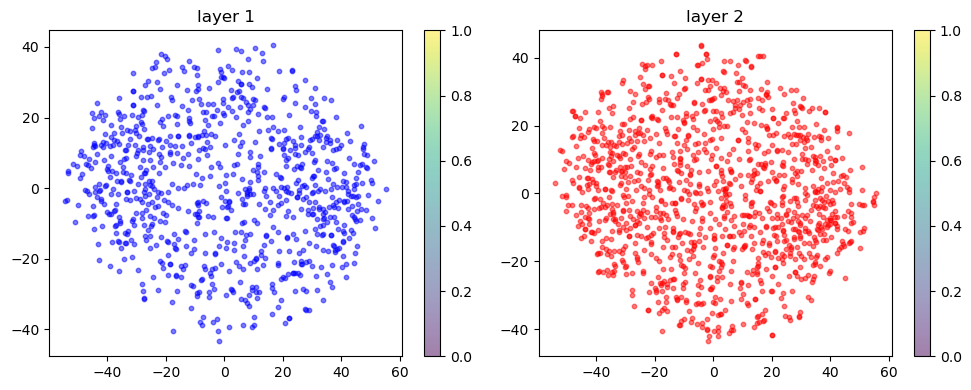

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ilayer1 = np.where(layers[ichannels] == 1)[0]
ilayer2 = np.where(layers[ichannels] == 2)[0]
sc = ax[0].scatter(conv2_1x1_tsne[ilayer1, 0], conv2_1x1_tsne[ilayer1, 1], c='blue', s=10, alpha=0.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('layer 1')
ax[1].scatter(conv2_1x1_tsne[ilayer2, 0], conv2_1x1_tsne[ilayer2, 1], c='red', s=10, alpha=0.5)
ax[1].set_title('layer 2')
cbar = plt.colorbar(sc, ax=ax[1])
plt.tight_layout()

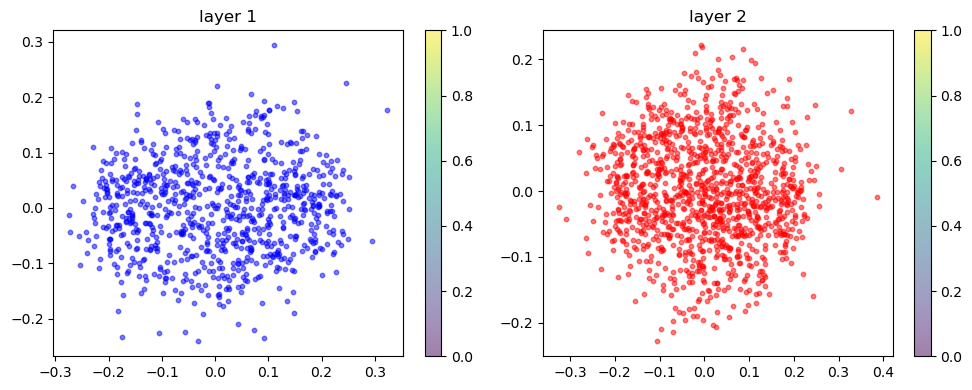

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ilayer1 = np.where(layers[ichannels] == 1)[0]
ilayer2 = np.where(layers[ichannels] == 2)[0]
sc = ax[0].scatter(conv2_1x1_pca[ilayer1, 0], conv2_1x1_pca[ilayer1, 1], c='blue', s=10, alpha=0.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('layer 1')
ax[1].scatter(conv2_1x1_pca[ilayer2, 0], conv2_1x1_pca[ilayer2, 1], c='red', s=10, alpha=0.5)
ax[1].set_title('layer 2')
cbar = plt.colorbar(sc, ax=ax[1])
plt.tight_layout()

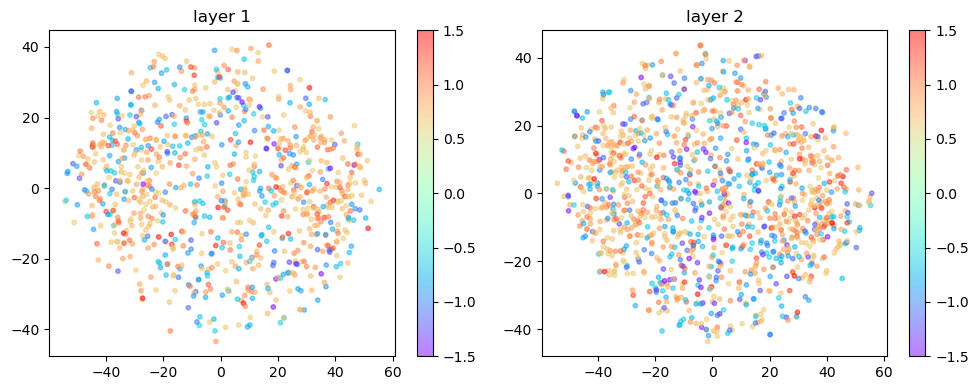

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ilayer1 = np.where(layers[ichannels] == 1)[0]
ilayer2 = np.where(layers[ichannels] == 2)[0]
sc = ax[0].scatter(conv2_1x1_tsne[ilayer1, 0], conv2_1x1_tsne[ilayer1, 1], c=readout_wc[ichannels][ilayer1], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('layer 1')
ax[1].scatter(conv2_1x1_tsne[ilayer2, 0], conv2_1x1_tsne[ilayer2, 1], c=readout_wc[ichannels][ilayer2], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1].set_title('layer 2')
cbar = plt.colorbar(sc, ax=ax[1])
plt.tight_layout()

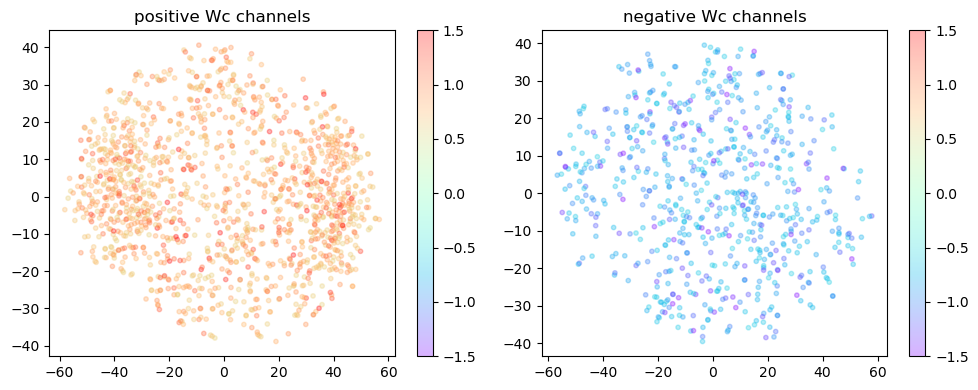

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sc = ax[0].scatter(conv2_1x1_tsne[ipos, 0], conv2_1x1_tsne[ipos, 1], c=readout_wc[ichannels][ipos], cmap='rainbow', s=10, alpha=0.3, vmin=-1.5, vmax=1.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('positive Wc channels')
ax[1].scatter(conv2_1x1_tsne[ineg, 0], conv2_1x1_tsne[ineg, 1], c=readout_wc[ichannels][ineg], cmap='rainbow', s=10, alpha=0.3, vmin=-1.5, vmax=1.5)
ax[1].set_title('negative Wc channels')
cbar = plt.colorbar(sc, ax=ax[1])
plt.tight_layout()

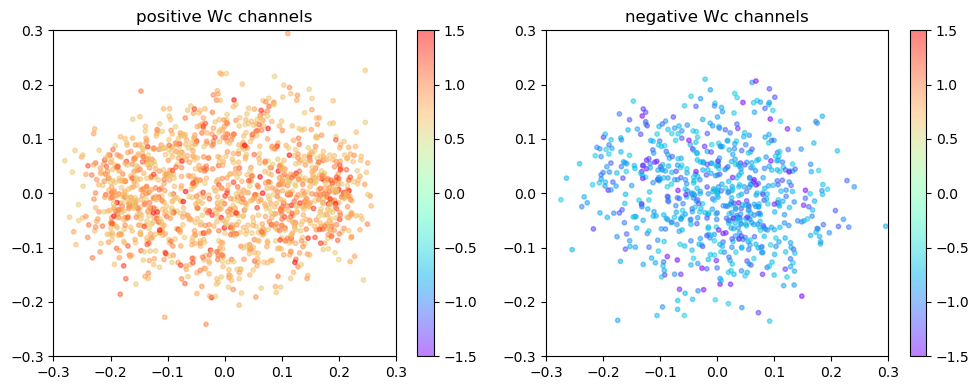

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sc = ax[0].scatter(conv2_1x1_pca[ipos, 0], conv2_1x1_pca[ipos, 1], c=readout_wc[ichannels][ipos], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('positive Wc channels')
ax[0].set_xlim([-0.3, 0.3])
ax[0].set_ylim([-0.3, 0.3])
ax[1].scatter(conv2_1x1_pca[ineg, 0], conv2_1x1_pca[ineg, 1], c=readout_wc[ichannels][ineg], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1].set_title('negative Wc channels')
cbar = plt.colorbar(sc, ax=ax[1])
ax[1].set_xlim([-0.3, 0.3])
ax[1].set_ylim([-0.3, 0.3])
plt.tight_layout()

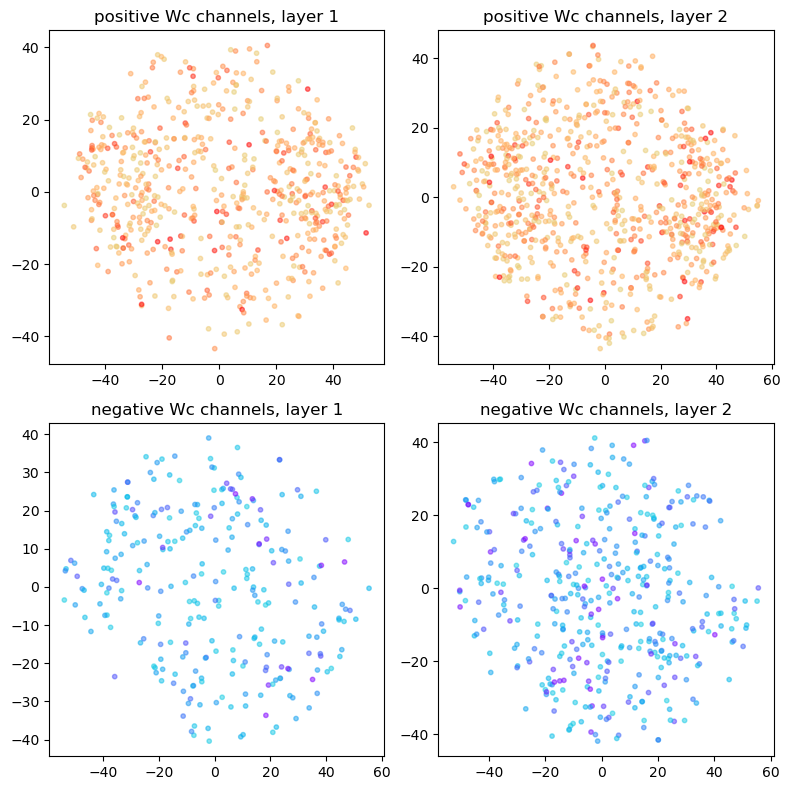

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
idx = np.intersect1d(ilayer1, ipos)
sc = ax[0, 0].scatter(conv2_1x1_tsne[idx, 0], conv2_1x1_tsne[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[0, 0].set_title('positive Wc channels, layer 1')
idx = np.intersect1d(ilayer2, ipos)
sc = ax[0, 1].scatter(conv2_1x1_tsne[idx, 0], conv2_1x1_tsne[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[0, 1].set_title('positive Wc channels, layer 2')
idx = np.intersect1d(ilayer1, ineg)
sc = ax[1, 0].scatter(conv2_1x1_tsne[idx, 0], conv2_1x1_tsne[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1, 0].set_title('negative Wc channels, layer 1')
idx = np.intersect1d(ilayer2, ineg)
sc = ax[1, 1].scatter(conv2_1x1_tsne[idx, 0], conv2_1x1_tsne[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1, 1].set_title('negative Wc channels, layer 2')
plt.tight_layout()

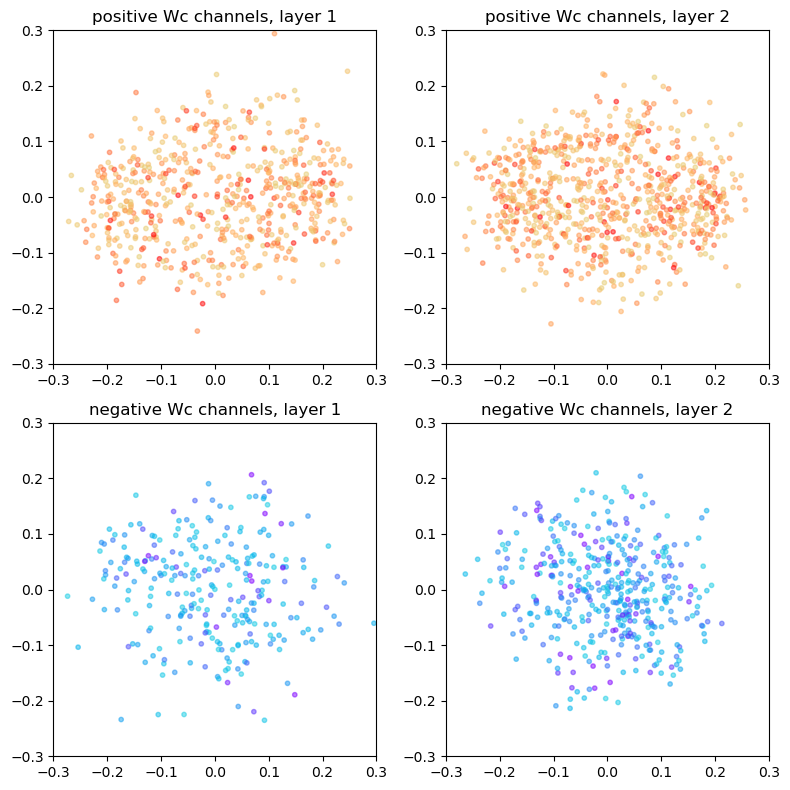

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
idx = np.intersect1d(ilayer1, ipos)
sc = ax[0, 0].scatter(conv2_1x1_pca[idx, 0], conv2_1x1_pca[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[0, 0].set_title('positive Wc channels, layer 1')
ax[0, 0].set_xlim([-0.3, 0.3])
ax[0, 0].set_ylim([-0.3, 0.3])
idx = np.intersect1d(ilayer2, ipos)
sc = ax[0, 1].scatter(conv2_1x1_pca[idx, 0], conv2_1x1_pca[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[0, 1].set_title('positive Wc channels, layer 2')
ax[0, 1].set_xlim([-0.3, 0.3])
ax[0, 1].set_ylim([-0.3, 0.3])
idx = np.intersect1d(ilayer1, ineg)
sc = ax[1, 0].scatter(conv2_1x1_pca[idx, 0], conv2_1x1_pca[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1, 0].set_title('negative Wc channels, layer 1')
ax[1, 0].set_xlim([-0.3, 0.3])
ax[1, 0].set_ylim([-0.3, 0.3])
idx = np.intersect1d(ilayer2, ineg)
sc = ax[1, 1].scatter(conv2_1x1_pca[idx, 0], conv2_1x1_pca[idx, 1], c=readout_wc[ichannels][idx], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1, 1].set_title('negative Wc channels, layer 2')
ax[1, 1].set_xlim([-0.3, 0.3])
ax[1, 1].set_ylim([-0.3, 0.3])
plt.tight_layout()

In [79]:
from sklearn.cluster import KMeans

# Number of clusters (adjust based on visual observation of the clusters)
n_clusters = 4  # Try adjusting this if needed

# Apply K-means clustering on the t-SNE output
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(conv2_1x1_tsne[ipos])

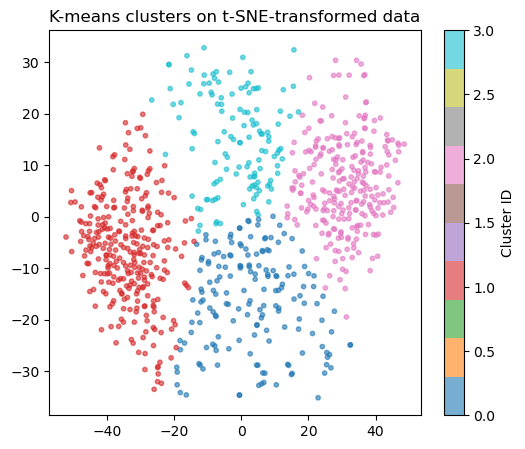

In [80]:
# Visualize the clusters on the t-SNE plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
scatter = ax.scatter(conv2_1x1_tsne[ipos, 0], conv2_1x1_tsne[ipos, 1], 
                     c=cluster_labels, cmap='tab10', s=10, alpha=0.6)
plt.colorbar(scatter, ax=ax, label='Cluster ID')
ax.set_title('K-means clusters on t-SNE-transformed data')
plt.show()

Mean of cluster 0:
 [-0.00141464 -0.01247381  0.01474861 -0.00673402 -0.01057758  0.01428755
 -0.01785121 -0.01872721 -0.0311338   0.00610253 -0.01062795 -0.03870723
 -0.01104818  0.0011112   0.00967617 -0.01937378]
Mean of cluster 1:
 [-0.02112416  0.01196661  0.09190695 -0.0002144   0.00910211  0.03749325
  0.0184322   0.01759302 -0.03710537  0.07573473  0.00260975  0.04066022
 -0.0024665   0.00676171  0.01622014  0.05248198]
Mean of cluster 2:
 [ 0.02018488 -0.02248511 -0.08793654  0.00582103 -0.02920704 -0.03473401
 -0.00538527 -0.00276116  0.04126843 -0.06918244  0.00144835 -0.03586981
  0.01136552  0.00521584 -0.00594048 -0.05449646]
Mean of cluster 3:
 [ 0.00231075  0.02884032  0.00032642  0.0014124   0.02292233 -0.0307976
 -0.00328616  0.00785658  0.00956742 -0.00950875 -0.01400831  0.02558294
  0.00788985 -0.02684959 -0.0467775  -0.00415891]


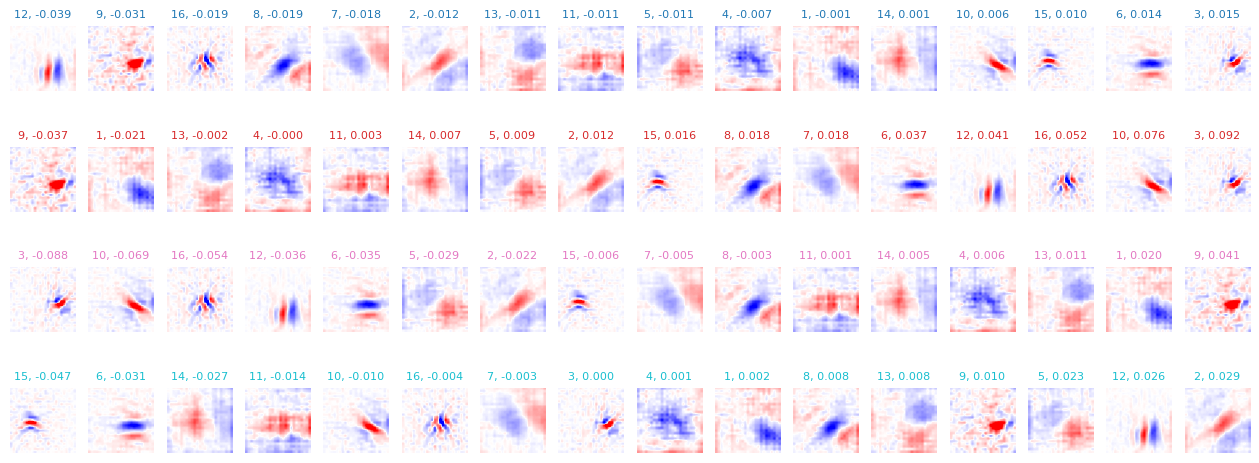

In [81]:
cluster_means = []
fig, ax = plt.subplots(n_clusters, 16, figsize=(16, 1*n_clusters+2))
cmap = plt.get_cmap('tab10')
for cluster_id in range(n_clusters):
    # Get indices of the points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    # Select the corresponding original weights (conv2_1x1) using ichannels
    original_weights = conv2_1x1[ichannels[ipos]][cluster_indices]
    
    # Compute the mean of the original weights for the current cluster
    cluster_mean = np.mean(original_weights, axis=0)
    cluster_means.append(cluster_mean)

    # Print or analyze the cluster mean as needed
    print(f"Mean of cluster {cluster_id}:\n", cluster_mean)
    isort = np.argsort(cluster_mean)
    for i in range(16):
        ax[cluster_id, i].imshow(conv1[isort[i]], cmap='bwr', vmin=-0.25, vmax=0.25)
        ax[cluster_id, i].set_title(f'{isort[i]+1}, {cluster_mean[isort[i]]:.3f}', fontsize=8, color=cmap(cluster_id/3))
        ax[cluster_id, i].axis('off')

In [90]:
from sklearn.cluster import KMeans

# Number of clusters (adjust based on visual observation of the clusters)
n_clusters = 6  # Try adjusting this if needed

# Apply K-means clustering on the t-SNE output
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(conv2_1x1_tsne[ineg])f

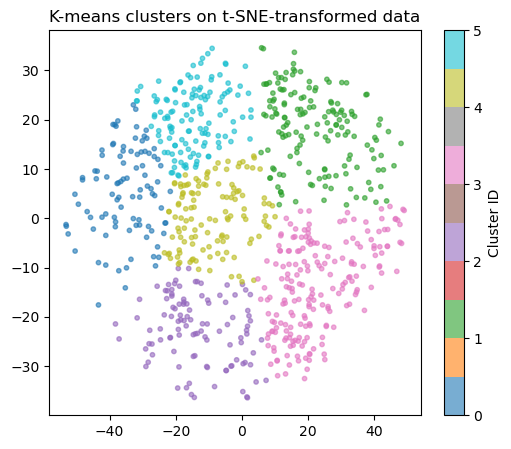

In [91]:
# Visualize the clusters on the t-SNE plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
scatter = ax.scatter(conv2_1x1_tsne[ineg, 0], conv2_1x1_tsne[ineg, 1], 
                     c=cluster_labels, cmap='tab10', s=10, alpha=0.6)
plt.colorbar(scatter, ax=ax, label='Cluster ID')
ax.set_title('K-means clusters on t-SNE-transformed data')
plt.show()

Mean of cluster 0:
 [-1.5559513e-02  2.3199596e-02  6.2553145e-02 -3.2244232e-02
 -9.9257566e-05  3.6550302e-02  3.5964590e-02  4.9455002e-02
 -2.4358779e-02  3.4088138e-02 -1.6758606e-02  7.2373100e-02
 -1.0460260e-02  1.8287323e-02  3.4806866e-02  5.9272524e-02]
Mean of cluster 1:
 [-0.02023183 -0.01732822 -0.03724341  0.01733516  0.00235874 -0.09322428
 -0.01831554 -0.01023452  0.0371039  -0.04970418 -0.02115091 -0.01342868
 -0.00837149  0.00390633 -0.04943768 -0.0273825 ]
Mean of cluster 2:
 [ 0.03777828 -0.006465    0.04070858  0.00169136 -0.00942031  0.07807994
  0.00964181 -0.01132762 -0.02280802  0.03637428 -0.00091442 -0.01657432
  0.0019588   0.01032803  0.02905117 -0.00264042]
Mean of cluster 3:
 [-8.9148081e-05 -3.6635965e-02 -1.6332293e-02  5.3273099e-03
 -3.0500872e-02 -8.6508989e-03 -4.3943614e-02 -5.0665226e-02
  1.9037954e-03 -3.1262282e-02  1.0785889e-02 -8.6884573e-02
 -1.5543402e-02 -2.5876377e-02  1.0390259e-02 -2.0414146e-02]
Mean of cluster 4:
 [ 0.00993203  0.04

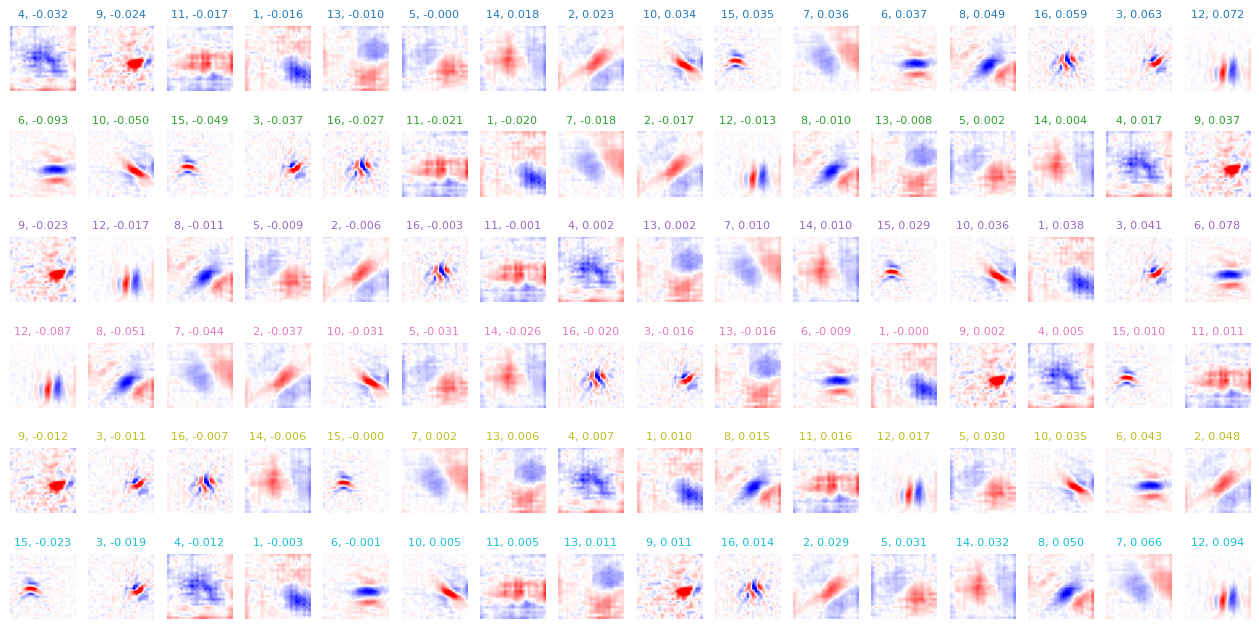

In [93]:
cluster_means = []
fig, ax = plt.subplots(n_clusters, 16, figsize=(16, 1*n_clusters+2))
cmap = plt.get_cmap('tab10')
for cluster_id in range(n_clusters):
    # Get indices of the points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    # Select the corresponding original weights (conv2_1x1) using ichannels
    original_weights = conv2_1x1[ichannels[ineg]][cluster_indices]
    
    # Compute the mean of the original weights for the current cluster
    cluster_mean = np.mean(original_weights, axis=0)
    cluster_means.append(cluster_mean)

    # Print or analyze the cluster mean as needed
    print(f"Mean of cluster {cluster_id}:\n", cluster_mean)
    isort = np.argsort(cluster_mean)
    for i in range(16):
        ax[cluster_id, i].imshow(conv1[isort[i]], cmap='bwr', vmin=-0.25, vmax=0.25)
        ax[cluster_id, i].set_title(f'{isort[i]+1}, {cluster_mean[isort[i]]:.3f}', fontsize=8, color=cmap(cluster_id/5))
        ax[cluster_id, i].axis('off')

## tsne of spatial conv

In [48]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
conv2_spatial_tsne = tsne.fit_transform(conv2_spatial[ichannels].reshape(len(ichannels), -1))

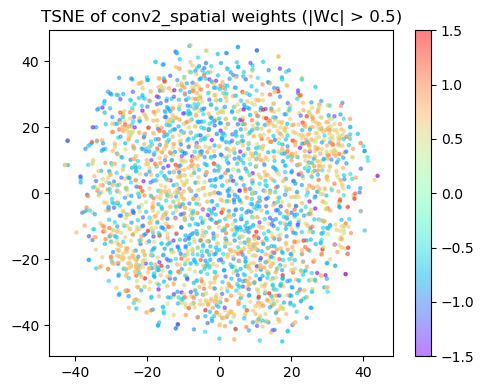

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(conv2_spatial_tsne[:, 0], conv2_spatial_tsne[:, 1], c=readout_wc[ichannels], cmap='rainbow', s=5, alpha=0.5, vmin=-1.5, vmax=1.5)
ax.set_title(f'TSNE of conv2_spatial weights (|Wc| > {thresh})')
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
plt.tight_layout()

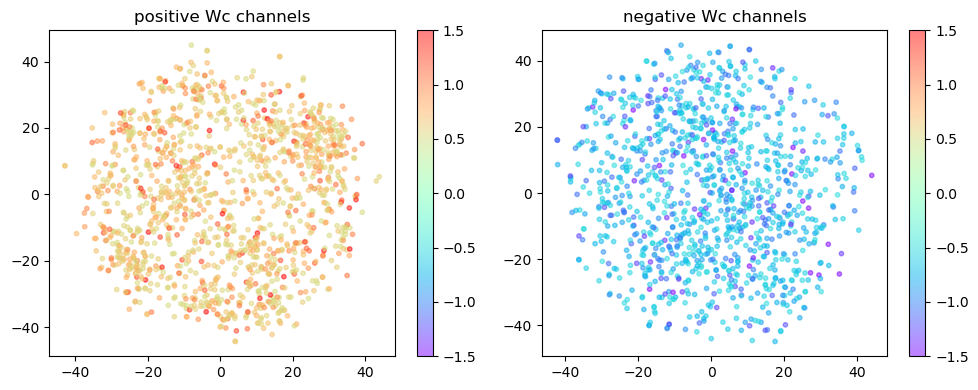

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sc = ax[0].scatter(conv2_spatial_tsne[ipos, 0], conv2_spatial_tsne[ipos, 1], c=readout_wc[ichannels][ipos], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
# add colorbar
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_title('positive Wc channels')
ax[1].scatter(conv2_spatial_tsne[ineg, 0], conv2_spatial_tsne[ineg, 1], c=readout_wc[ichannels][ineg], cmap='rainbow', s=10, alpha=0.5, vmin=-1.5, vmax=1.5)
ax[1].set_title('negative Wc channels')
cbar = plt.colorbar(sc, ax=ax[1])
plt.tight_layout()

# fullmodel weights

In [86]:
# load fullmodel
# build model
device = torch.device('cuda')
from minimodel import model_builder
nlayers = 2
nconv1 = 16
nconv2 = 320
model, in_channels = model_builder.build_model(NN=data.NNs[mouse_id], n_layers=nlayers, n_conv=nconv1, n_conv_mid=nconv2)
model_name = model_builder.create_model_name(data.mouse_names[mouse_id], data.exp_date[mouse_id], n_layers=nlayers, in_channels=in_channels)
weight_path = '../notebooks/checkpoints/fullmodel'
model_path = os.path.join(weight_path, model_name)
model = model.to(device)
model.load_state_dict(torch.load(model_path), strict=False)

input shape of readout:  (320, 33, 65)
model name:  FX10_051623_2layer_16_320_clamp_norm_depthsep_pool.pt


<All keys matched successfully>

In [87]:
fullmodel_conv2_spatial = model.core.features.layer1.ds_conv.spatial_conv.weight.data.cpu().numpy().squeeze()
print(fullmodel_conv2_spatial.shape)
fullmodel_conv2_spatial = fullmodel_conv2_spatial.reshape(fullmodel_conv2_spatial.shape[0], -1)
print(fullmodel_conv2_spatial.shape)

(320, 9, 9)
(320, 81)


In [101]:
# pca on spatial weights and visualize the top N PCs
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pca.fit(fullmodel_conv2_spatial.T)
spatial_pcs = pca.transform(fullmodel_conv2_spatial.T)
print(spatial_pcs.shape)

(81, 64)


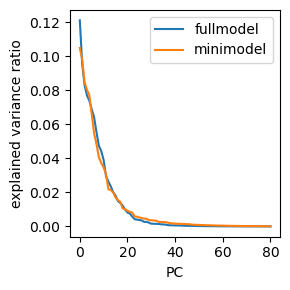

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(pca.explained_variance_ratio_, '-', label='fullmodel')
ax.plot(minimodel_ev_ratio, '-', label='minimodel')
ax.legend()
ax.set_xlabel('PC')
ax.set_ylabel('explained variance ratio')
# ax.set_ylim([0, 0.03])
plt.tight_layout()

0.99999994


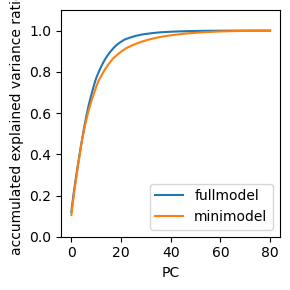

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(np.cumsum(pca.explained_variance_ratio_), '-', label='fullmodel')
ax.plot(np.cumsum(minimodel_ev_ratio), '-', label='minimodel')
ax.legend()
ax.set_xlabel('PC')
ax.set_ylabel('accumulated explained variance ratio')
ax.set_ylim([0, 1.1])
plt.tight_layout()
print(np.sum(pca.explained_variance_ratio_))

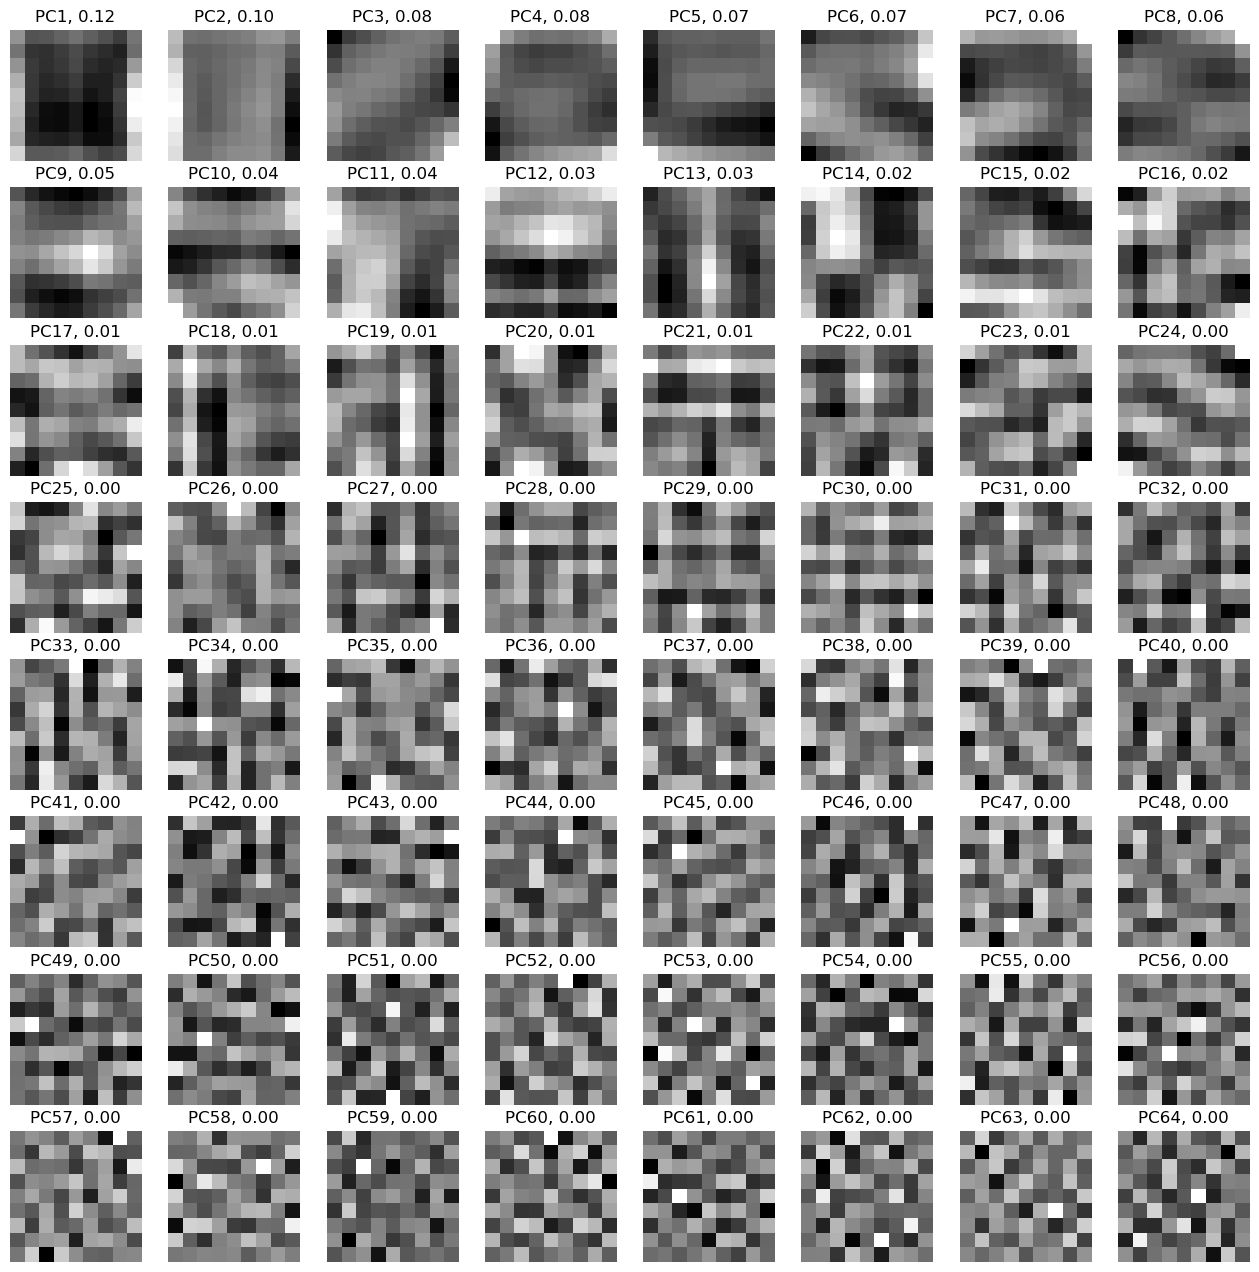

In [102]:
# visualize PCs
fig, ax = plt.subplots(8, 8, figsize=(16, 16))
for i in range(64):
    ax[i//8, i%8].imshow(spatial_pcs[:, i].reshape(9, 9), cmap='gray') # cmap='bwr', vmin=-0.05, vmax=0.05)
    ax[i//8, i%8].axis('off')
    ax[i//8, i%8].set_title(f'PC{i+1}, {pca.explained_variance_ratio_[i]:.2f}')

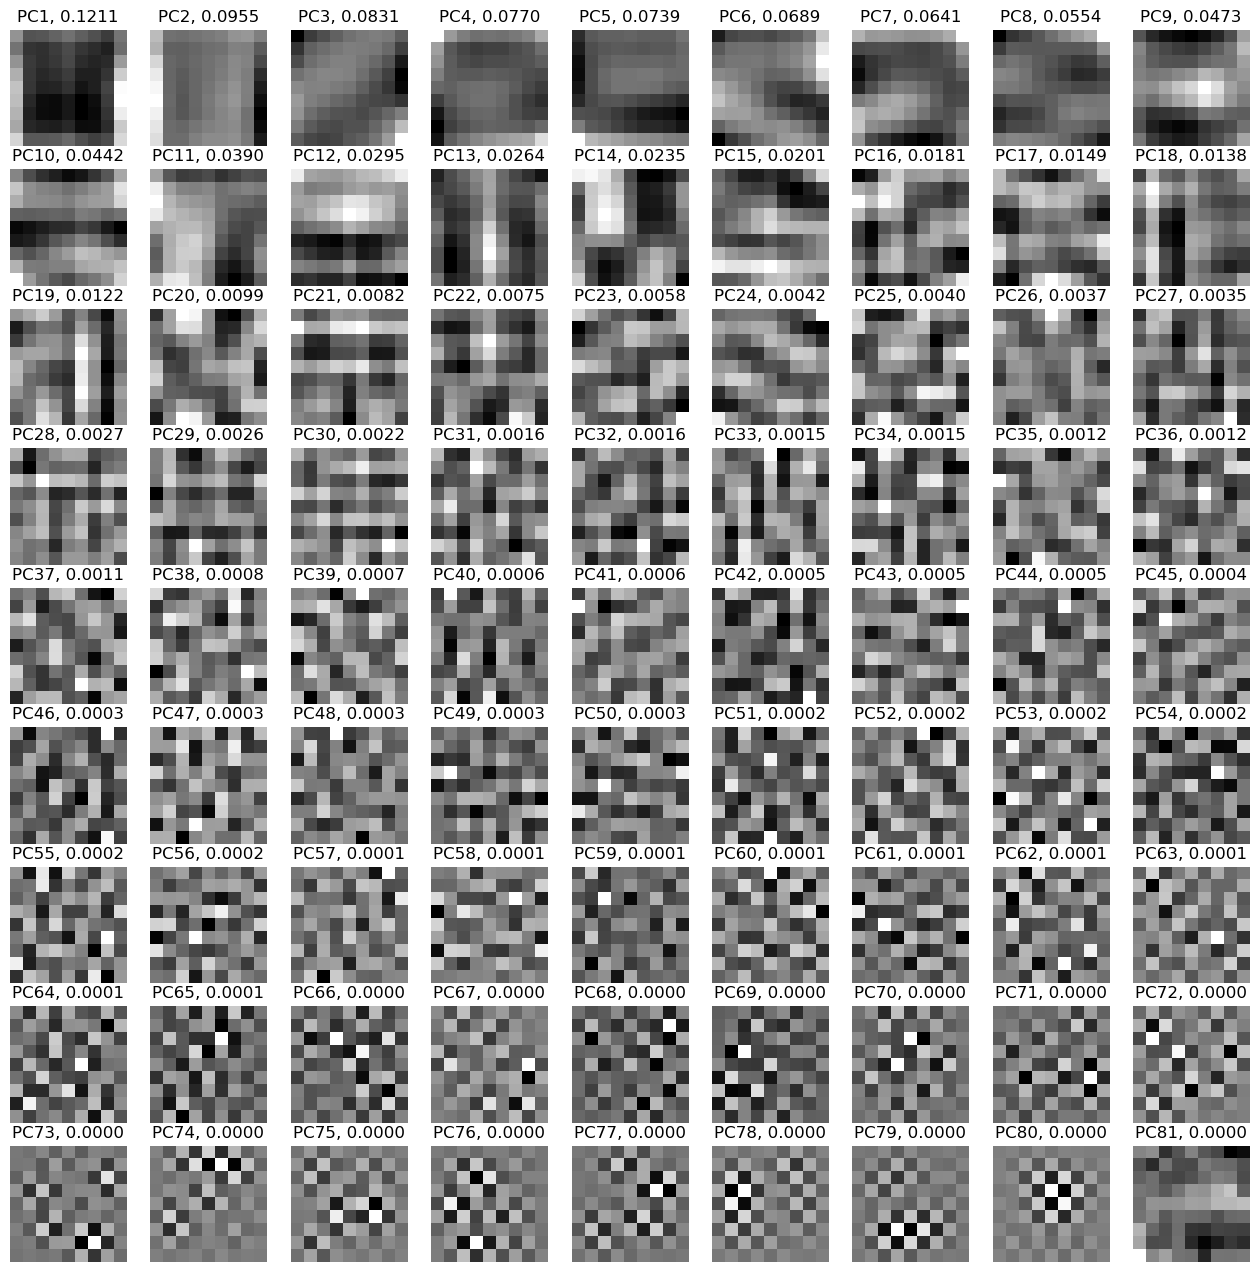

In [100]:
# visualize PCs
fig, ax = plt.subplots(9, 9, figsize=(16, 16))
for i in range(81):
    ax[i//9, i%9].imshow(spatial_pcs[:, i].reshape(9, 9), cmap='gray') # cmap='bwr', vmin=-0.1, vmax=0.1)
    ax[i//9, i%9].axis('off')
    ax[i//9, i%9].set_title(f'PC{i+1}, {pca.explained_variance_ratio_[i]:.4f}')